# EDA

Содержит предварительный анализ данных до обработок

In [3]:
from helper.dataclass import *
from helper.preprocessing import *
from helper.eda import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Overall information

- smart 5 - Число операций переназначения секторов. Когда диск обнаруживает ошибку чтения/записи
- smart 9 - Power-on Time Count
- smart 187 - Количество ошибок, которое накопитель сообщил хосту (интерфейсу компьютера) при любых операциях
- smart 188 - Количество прерванных операций в связи с таймаутом HDD
- smart 192 - Число циклов выключений или аварийных отказов
- smart 197 - Число секторов, являющихся кандидатами на замену.
- smart 198 - Число некорректируемых (средствами диска) секторов. (критические дефекты)
- smart 199 - число ошибок, возникающих при передаче данных по интерфейсу
- smart 240 - Общее время нахождения блока головок в рабочем положении в часах.
- smart 241 - полное число записанных секторов.
- smart 242 - полное число прочитанных секторов.

In [4]:
hdd_dataset = HDDDataset.read_csv('ST14000NM001G.csv')

In [4]:
eda = EDA(hdd_dataset)
eda.show_info()
#eda.select_disk('ZL20A2G8')

=== Общая информация ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320142 entries, 0 to 7320141
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   serial_number   object 
 2   model           object 
 3   capacity_bytes  int64  
 4   failure         int64  
 5   smart_5_raw     float64
 6   smart_9_raw     float64
 7   smart_187_raw   float64
 8   smart_188_raw   float64
 9   smart_192_raw   float64
 10  smart_197_raw   float64
 11  smart_198_raw   float64
 12  smart_199_raw   float64
 13  smart_240_raw   float64
 14  smart_241_raw   float64
 15  smart_242_raw   float64
dtypes: float64(11), int64(2), object(3)
memory usage: 893.6+ MB
None

=== Первые строки информации ===
         date serial_number          model  capacity_bytes  failure  \
0  2020-11-14      ZL201VZX  ST14000NM001G  14000519643136        0   
1  2020-11-15      ZL201VZX  ST14000NM001G  14000519643136        0   
2  2020-11-16      ZL20

### Disks' information

In [4]:
# for i, disk in enumerate(eda.df['serial_number'].unique()):
#     print(f"disk: {disk} - {len(hdd_dataset.df[hdd_dataset.df['serial_number'] == disk])}")
#     if i == 10: break

## Vizualization

In [5]:
SMART_LIST = [i for i in eda.df.columns if i.startswith('smart_')]
SMART_LIST

['smart_5_raw',
 'smart_9_raw',
 'smart_187_raw',
 'smart_188_raw',
 'smart_192_raw',
 'smart_197_raw',
 'smart_198_raw',
 'smart_199_raw',
 'smart_240_raw',
 'smart_241_raw',
 'smart_242_raw']

In [6]:
# eda.df[SMART_LIST].nunique()

In [7]:
# eda.plot_time_series(SMART_LIST, multiplot=True)

In [8]:
# eda.unselect_disk()
# eda.plot_histograms(SMART_LIST)

In [9]:
from scipy.stats import skew, kurtosis
hdd_dataset = HDDDataset.read_csv('ST14000NM001G.csv')

for s in SMART_LIST:
    print(f"assymetry for s: {s}: {skew(eda.df[s])} - {kurtosis(eda.df[s])}")

assymetry for s: smart_5_raw: 80.66866573787316 - 7716.739383529317
assymetry for s: smart_9_raw: 0.2540576957549096 - -0.9312928402698217
assymetry for s: smart_187_raw: 147.97888336215297 - 31517.604861278433
assymetry for s: smart_188_raw: 8.613512415385351 - 93.40399599309184
assymetry for s: smart_192_raw: 106.91938286364328 - 11583.862314389331
assymetry for s: smart_197_raw: 421.1138338179828 - 226907.19655870734
assymetry for s: smart_198_raw: 421.1138338179828 - 226907.19655870734
assymetry for s: smart_199_raw: 36.426164267677706 - 1617.7455350639893
assymetry for s: smart_240_raw: 0.2579738471509671 - -0.9280111773455597
assymetry for s: smart_241_raw: -0.5689914277554522 - -0.3211474271502395
assymetry for s: smart_242_raw: 1.1238459759576893 - 1.208767418863541


=== Корреляционная матрица для выбранного диска ===


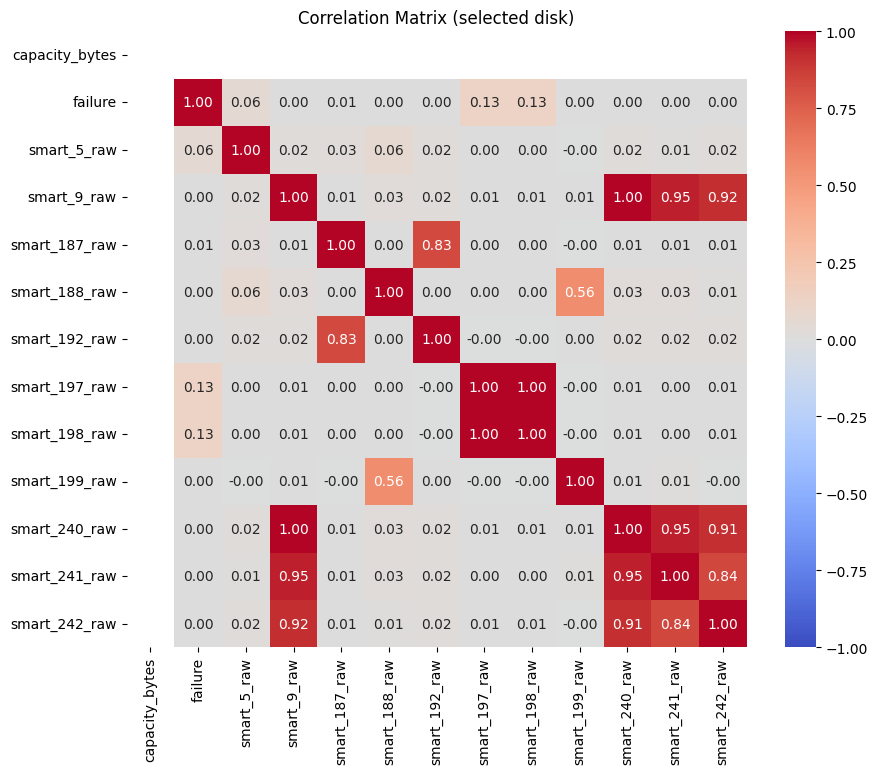

In [10]:
eda.plot_correlation_matrix()

smart_9_raw
smart_240_raw
smart_241_raw
smart_242_raw


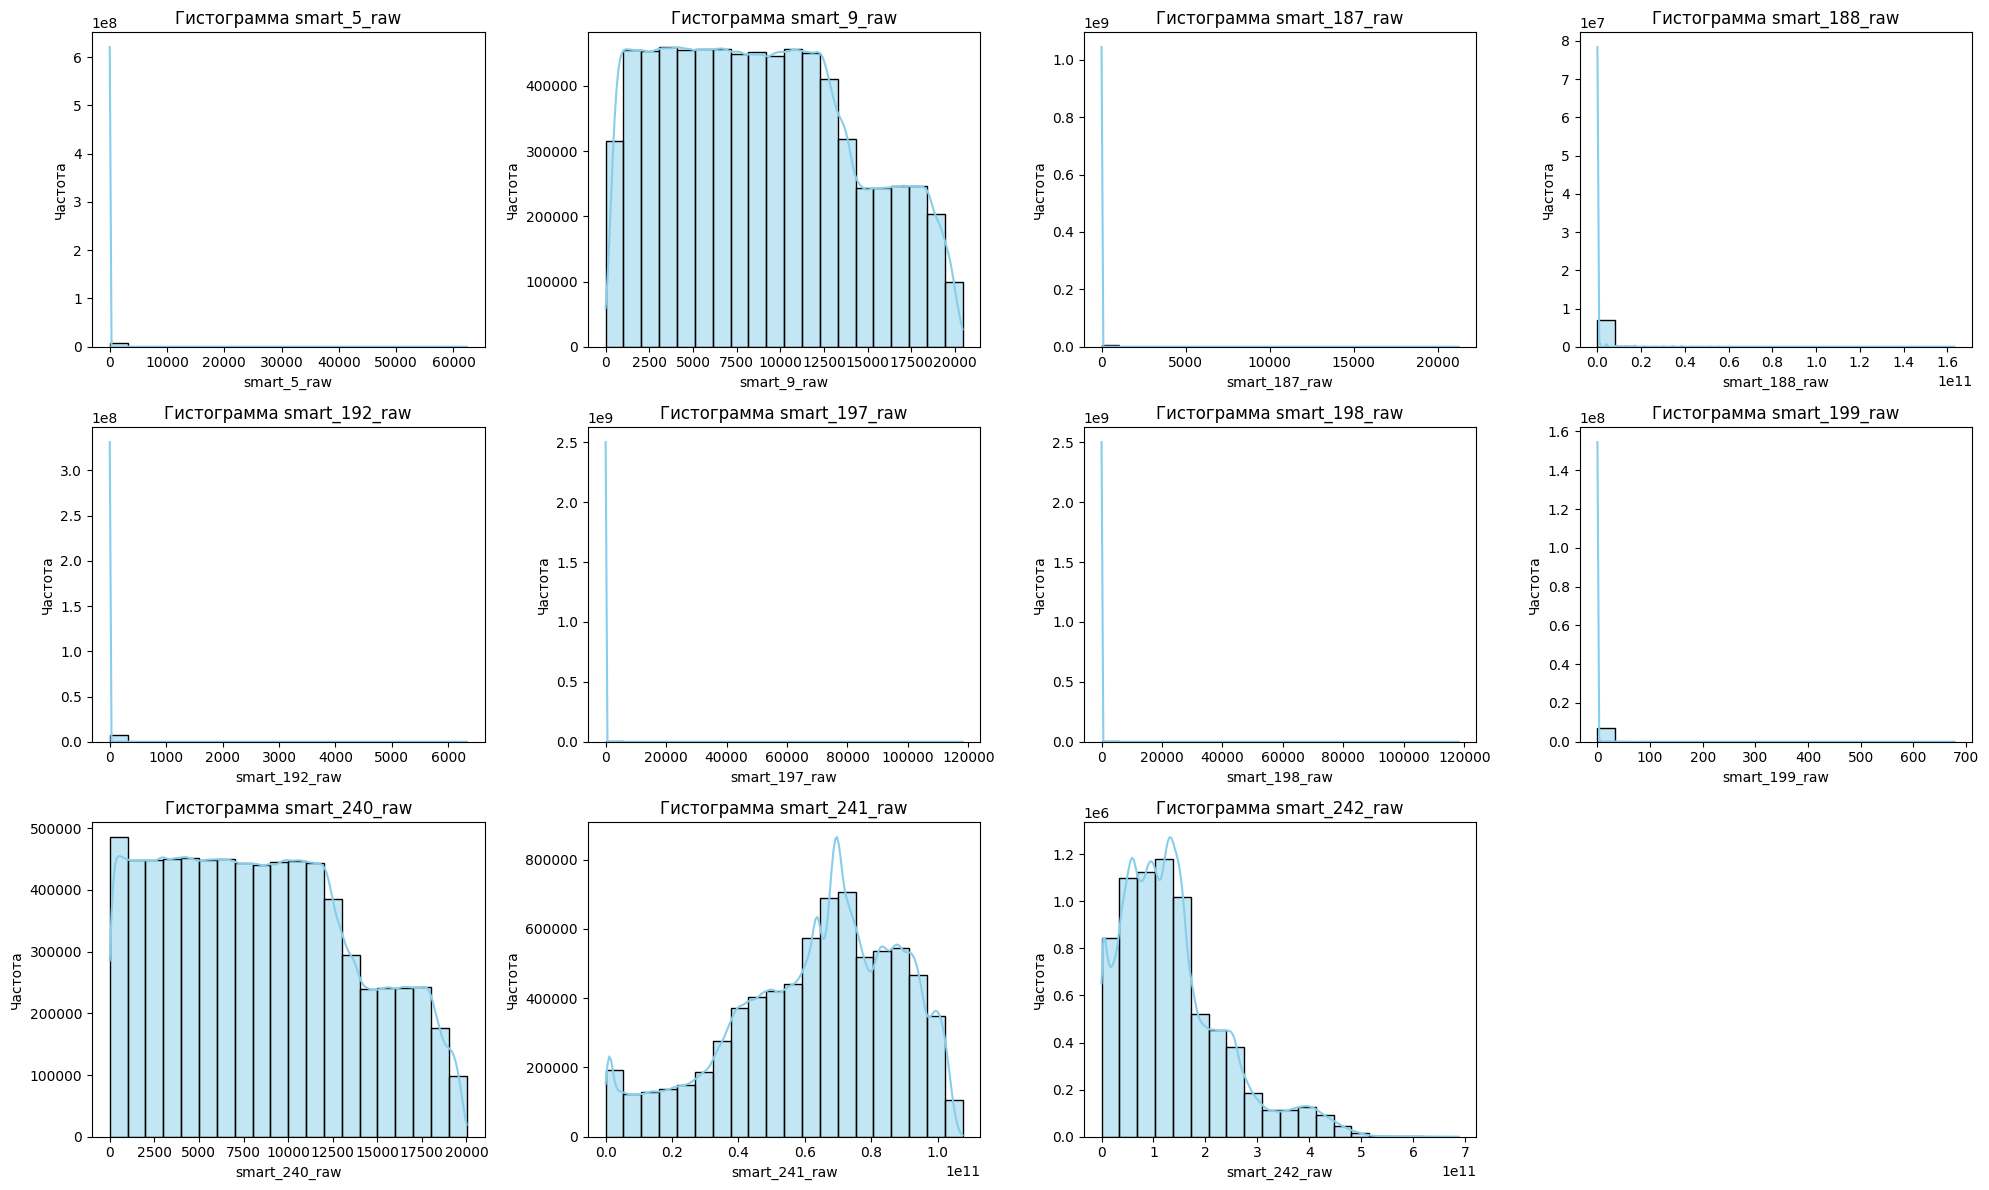

assymetry for s: smart_5_raw:10.92249387898065 - 148.17367222814127
assymetry for s: smart_9_raw:-0.18115023256128007 - -0.8823074110447848
assymetry for s: smart_187_raw:19.791397588069962 - 486.18181090854245
assymetry for s: smart_188_raw:4.37901688500833 - 17.27411123572061
assymetry for s: smart_192_raw:2.1099907325453233 - 8.475934630273557
assymetry for s: smart_197_raw:20.67760115945318 - 510.3377126550761
assymetry for s: smart_198_raw:20.67760115945318 - 510.3377126550761
assymetry for s: smart_199_raw:5.6705826418463285 - 34.40248550226162
assymetry for s: smart_240_raw:-0.24958322966027666 - -0.8019134132753369
assymetry for s: smart_241_raw:-0.44264061329199816 - -0.5252528010708204
assymetry for s: smart_242_raw:-0.05601731563394861 - -0.021176676489973012


In [11]:
# boxcox lmb = 0.35 for s9, s240, s242
boxcox35list = ['smart_9_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw']
loglist = ['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_192_raw', 'smart_197_raw', 'smart_198_raw', 'smart_199_raw']
hdd_dataset = HDDDataset.read_csv('ST14000NM001G.csv')
preprocessor = Preprocessing(hdd_dataset)
for b in boxcox35list:
    print(b)
    preprocessor.normalize_data([b], method='boxcox')
preprocessor.normalize_data(loglist, method='log1p')
eda.plot_histograms(SMART_LIST)

for s in SMART_LIST:
    print(f"assymetry for s: {s}:{skew(preprocessor.df[s])} - {kurtosis(preprocessor.df[s])}")

=== Корреляционная матрица для выбранного диска ===


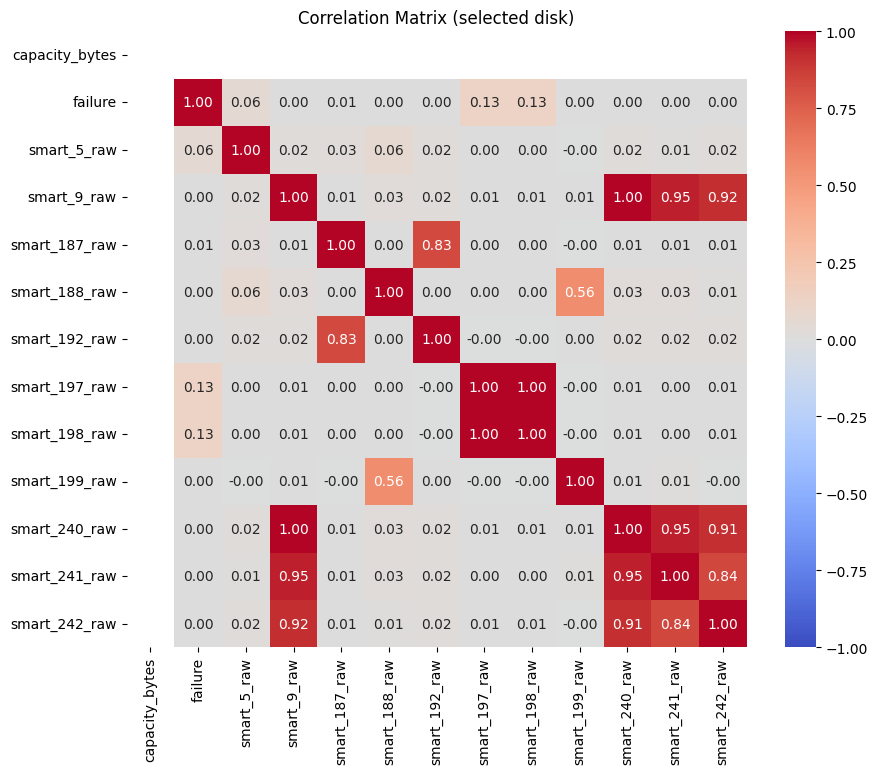

In [12]:
eda.plot_correlation_matrix()